<a href="https://colab.research.google.com/github/janpeter19/BPL_TEST2_Chemostat/blob/main/BPL_TEST2_Chemostat_fmpy_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_TEST2_Chemostat script with FMPy

The key library FMPy is installed.

After the installation a small application BPL_TEST2_Chemostat is loaded and run. You can continue with this example if you like.

In [1]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


In [2]:
!python --version

Python 3.12.12


In [3]:
!uv pip install fmpy # Install the key package

Using Python 3.12.12 environment at: /usr
Resolved 19 packages in 629ms
Prepared 3 packages in 2.91s
Uninstalled 2 packages in 156ms
Installed 3 packages in 107ms
 - cmake==3.31.6
 + cmake==4.1.2
 + fmpy==0.3.26
 - numpy==2.0.2
 + numpy==2.3.5


## Now specific installation run a simulation and notebook for that

Start with connecting to Github. Then upload the two files:

* FMU - BPL_TEST2_Chemostat_linux_om_me.fmu
* Setup-file - BPL_TEST2_Chemostat_fmpy_explore.py

In [4]:
%%bash
git clone https://github.com/janpeter19/BPL_TEST2_Chemostat

Cloning into 'BPL_TEST2_Chemostat'...


In [5]:
%cd BPL_TEST2_Chemostat

/content/BPL_TEST2_Chemostat


## BPL_TEST2_Chemostat - demo

In [6]:
run -i BPL_TEST2_Chemostat_fmpy_explore.py

Linux - run FMU pre-compiled OpenModelica

Model for the process has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [7]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

No processDiagram.png file in the FMU, but try the file on disk.


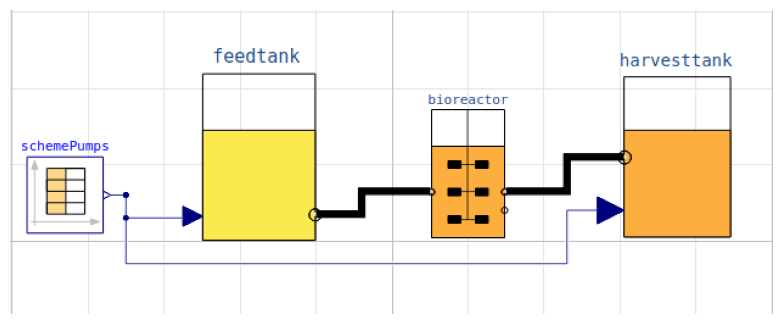

In [8]:
process_diagram()

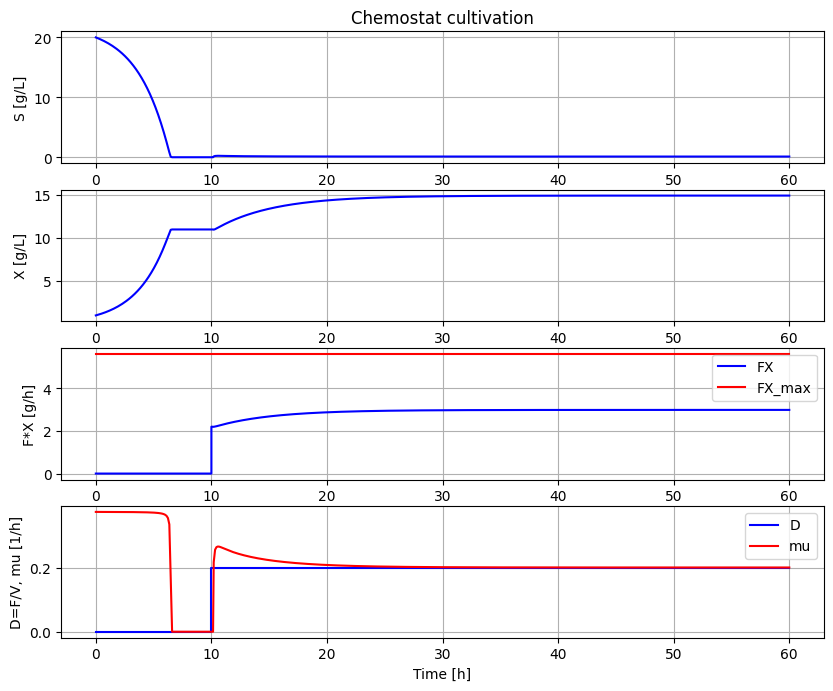

In [9]:
newplot()
par(Y=0.50, qSmax=0.75,  Ks=0.1)               # Culture parameters
init(V_start=1.0, VX_start=1.0, VS_start=20)   # Bioreactor startup
par(S_in=30, t0=0, F0=0, t1=10, F1=0.2)        # Substrate feeding
simu(60)

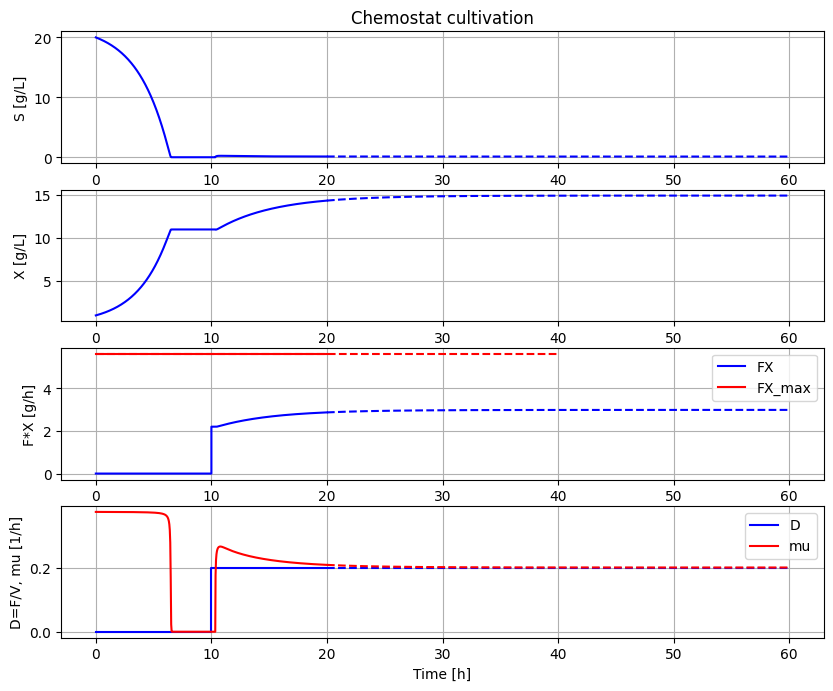

In [10]:
# Test simu('cont')
newplot()
simu(20)
simu(40,'cont')

In [11]:
describe('parts')

['bioreactor', 'bioreactor.culture', 'D', 'feedtank', 'harvesttank', 'schemePumps']


In [12]:
describe('MSL')

MSL: 4.1.0 - used components: RealInput, RealOutput, CombiTimeTable, Types


In [13]:
system_info()


System information
 -OS: Linux
 -Python: 3.12.12
 -Scipy: not installed in the notebook
 -FMPy: 0.3.26
 -FMU by: OpenModelica Compiler OpenModelica 1.26.0~dev-200-gcb3254b
 -FMI: 2.0
 -Type: ME
 -Name: BPL.Examples_TEST2.Chemostat
 -Generated: 2025-07-28T07:59:17Z
 -MSL: 4.1.0
 -Description: Bioprocess Library version 2.3.1
 -Interaction: FMU-explore for FMPy version 1.0.2
